A notebook for checking the focus of the cameras, by imaging of the Siemens 36 spoke Start Chart.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import orochi_sim_ctrl as osc

In [3]:
ic = osc.start_ic()
camera_config = osc.load_camera_config()
cameras = osc.connect_cameras(ic, camera_config)
osc.configure_cameras(cameras)

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 2 (DMK 33GX249 10910289) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
1
Video Format set to : Y16 (1920x1200)
1
Sink Format set to : "SinkFormats.Y16"
Setting Frame Rate to : 30.0 FPS
set frame rate err: 1
Frame Rate set to : 33 FPS
Image size: 1920 x 1200 pixels
Image buffer size: 36864000 bytes
Bits per pixel: 2
Color Format: SinkFormats.Y16
Frame Rate: 33
Brightness current Value: 0
Contrast current Value: 0
Sharpness current Value: 0
Gamma current Value: 100
Gain current Value: 4.300000190734863
Gain current Auto: 0


In [4]:
exposures = osc.find_channel_exposures(cameras, init_t_exp=0.4, target=0.80, n_hot=10,tol=10, limit=10, roi=True)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Trial 0:
Imaging with Exposure: 0.4000000059604645 s
+Good exposure 0.4000000059604645 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.4000000059604645
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.06400000303983688 (err of -2.0861625621426683e-09
Trial 1:
Imaging with Exposure: 0.06400000303983688 s
+Good exposure 0.06400000303983688 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.06400000303983688
Expected new quantile: 0.16 x 20470.0 = 3275.2000000000003
Exposure set to 0.010239999741315842 (err of 7.450580603862722e-10
Trial 2:
Imaging with Exposure: 0.010239999741315842 s
+Good exposure 0.010239999741315842 Image recieved
Quantile: 1570.0, Target: 3275.2000000000003
Exposure current Value: 0.010239999741315842
Expected new quantile: 2.086114649681529 x 1570.0 = 3275.20000000000

In [5]:
subject = 'focus_1_illum_28062023'
check_stk = {}
for camera in cameras:
    t_exp = exposures[camera.name]
    camera.set_exposure(t_exp)
    ave, std = camera.image_capture_repeat(n=25, roi=True)
    print(ave.shape)
    check_stk[camera.name] = ave
    name = f'focus_1_{camera.name}_ave'
    camera.save_image(name, subject, 'ave', ave)
    name = f'focus_1_{camera.name}_std'
    camera.save_image(name, subject, 'std', std)  

True
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.

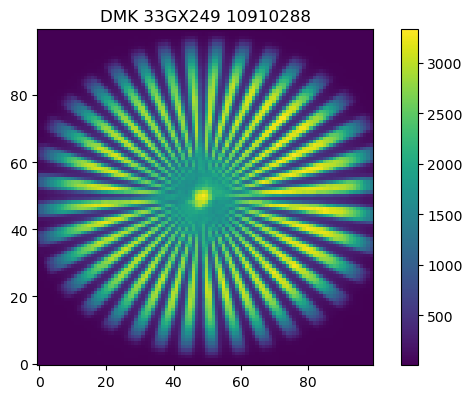

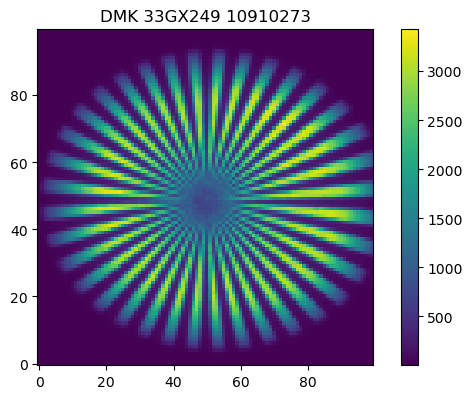

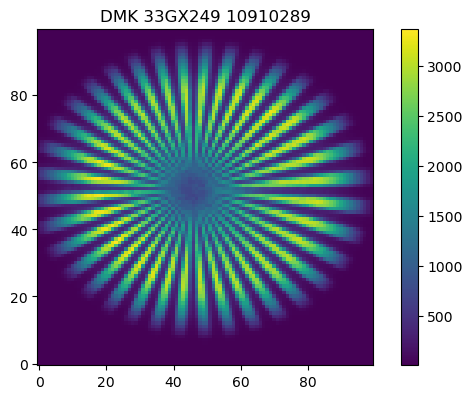

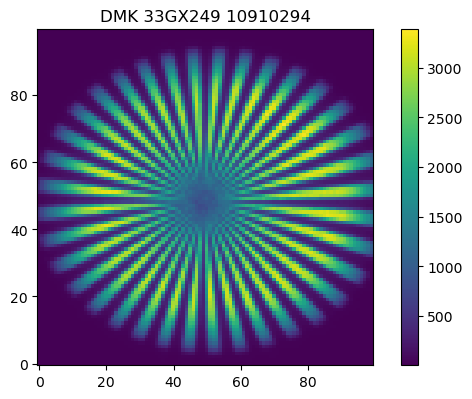

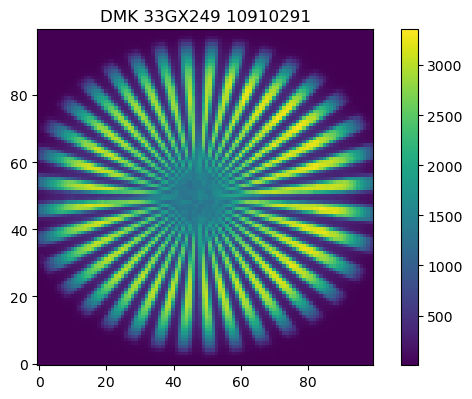

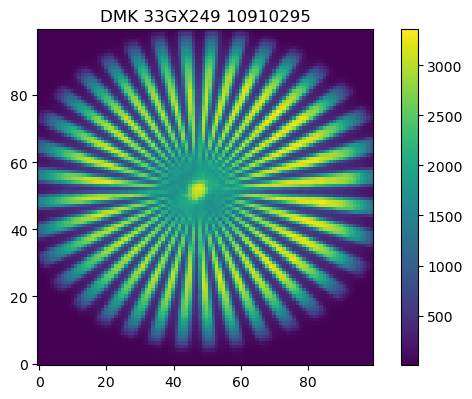

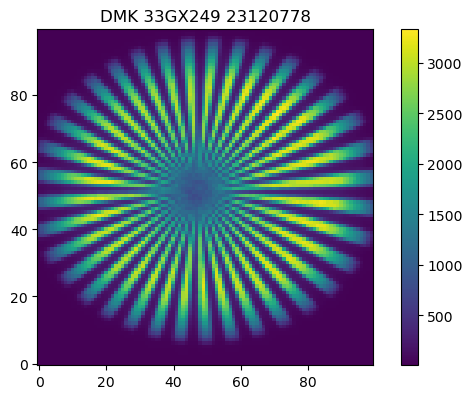

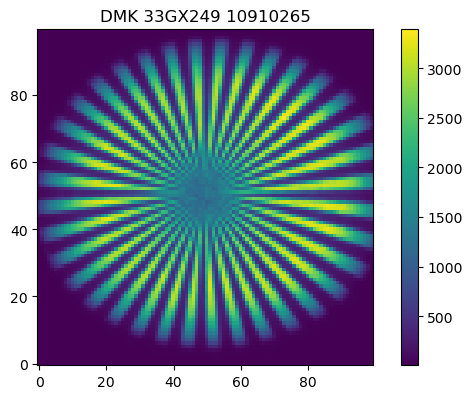

In [6]:
for camera in cameras:
    img = check_stk[camera.name]
    camera.show_image(img, camera.name)

In [7]:
subject = 'focus_1_dark_28062023'
for camera in cameras:
    t_exp = exposures[camera.name]
    camera.set_exposure(t_exp)
    ave, std = camera.image_capture_repeat(n=25)
    name = f'dark_{camera.name}_ave'
    camera.save_image(name, subject, 'ave', ave)
    name = f'dark_{camera.name}_std'
    camera.save_image(name, subject, 'std', std)    

True
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.021531999111175537 s
+Good exposure 0.021531999111175537 Image recieved
Imaging with Exposure: 0.